In [65]:
import sys
import os
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt

import pandas as pd

os.environ["USE_PYGEOS"] = "0"
import geopandas as gpd

sys.path.insert(0, "../src/")

from landprice_merger import (
    zensus_landprice_merger,
    landprice_neighborhood_merger,
    combine_landprice_with_geodata,
)
from csv_merger import combine_csvs
from principal_component_analysis import combine_PCA_datasets


In [12]:
cities = ["Berlin", "Bremen", "Dresden", "Frankfurt", "Köln"]

main_path = os.path.join(os.getcwd(), "..")

path_zensus = os.path.join(main_path, "res", "data", "DLR", "2 Zensus")
path_land = os.path.join(main_path, "res", "data", "DLR", "1 Land Prices")
path_neigh = os.path.join(main_path, "res", "data", "DLR", "3 Neighborhoods")


In [13]:
df_zensus = combine_csvs(str_path=path_zensus)

gdf_zensus = combine_PCA_datasets(
    df_zensus=df_zensus, str_city=cities[3], str_path=path_zensus
)


In [14]:
df_land_prices = combine_csvs(str_path=path_land)

gdf_landprices = combine_landprice_with_geodata(
    df_landprice=df_land_prices, str_city=cities[2], str_path=path_land
)

gdf_landprices_names = landprice_neighborhood_merger(
    gdf_landprice=gdf_landprices, str_city=cities[2], str_path_neigh=path_neigh
)


In [15]:
result = zensus_landprice_merger(
    gdf_landprices=gdf_landprices_names, gdf_zensus=gdf_zensus
)


In [16]:
result.head()


,Grid_Code,City_Code,geometry,buildings_total_units,n_owned_without_current_household,n_rented_without_current_household,n_vacation_and_leisure,n_vacant,we_public_companies,we_housing_cooperative,...,Farmland,ForestryArea,GreenArea,IndustrialArea,MixedUseArea,OtherSpecialArea,Residential,SpecialUseArea,Village,Neighborhood_Name
0,100mN29902E42189,06412000,"POLYGON ((4218900.000 2990200.000, 4218900.000...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100mN29903E42189,06412000,"POLYGON ((4218900.000 2990300.000, 4218900.000...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100mN29903E42190,06412000,"POLYGON ((4219000.000 2990300.000, 4219000.000...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100mN29903E42191,06412000,"POLYGON ((4219100.000 2990300.000, 4219100.000...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100mN29904E42189,06412000,"POLYGON ((4218900.000 2990400.000, 4218900.000...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
ls_df_cities = []

for i in range(len(cities) -1):
    
    df_zensus = combine_csvs(str_path=path_zensus)

    gdf_zensus = combine_PCA_datasets(
    df_zensus=df_zensus, str_city=cities[i], str_path=path_zensus
    )

    df_land_prices = combine_csvs(str_path=path_land)

    gdf_landprices = combine_landprice_with_geodata(
        df_landprice=df_land_prices, str_city=cities[i], str_path=path_land
    )

    gdf_landprices_names = landprice_neighborhood_merger(
        gdf_landprice=gdf_landprices, str_city=cities[i], str_path_neigh=path_neigh
    )

    result = zensus_landprice_merger(
    gdf_landprices=gdf_landprices_names, gdf_zensus=gdf_zensus
    )

    result_grouped = result.groupby("Neighborhood_Name").median().reset_index()

    if cities[i] != "Frankfurt": 

        land_price_grid = gpd.read_file(path_neigh + "/Neighborhoods_" + cities[i] + ".gpkg")
        result_grouped = result_grouped.merge(land_price_grid, on = ["Neighborhood_Name", "Neighborhood_FID"])
        result_grouped_lm = result_grouped.drop(columns = ["Neighborhood_Name"])

        ls_df_cities.append(result_grouped_lm)
    elif cities[i] == "Frankfurt":

        land_price_grid = gpd.read_file(path_neigh + "/Neighborhoods_" + cities[i] + "_am_Main.gpkg")
        result_grouped = result_grouped.merge(land_price_grid, on = ["Neighborhood_Name", "Neighborhood_FID"])
        result_grouped_lm = result_grouped.drop(columns = ["Neighborhood_Name"])

        ls_df_cities.append(result_grouped_lm)


C:\Users\ferdi\AppData\Local\Temp\ipykernel_18220\352095301.py:25: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result_grouped = result.groupby("Neighborhood_Name").median().reset_index()
C:\Users\ferdi\AppData\Local\Temp\ipykernel_18220\352095301.py:25: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result_grouped = result.groupby("Neighborhood_Name").median().reset_index()
C:\Users\ferdi\AppData\Local\Temp\ipykernel_18220\352095301.py:25: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify nu

In [95]:
df_all_cities = pd.concat(ls_df_cities).dropna(axis = 1)


In [103]:
df_all_cities.columns

Index(['buildings_total_units', 'n_vacant',
       'gs_other_building_with_living_space', 'gt_semidetached_house',
       'gg_twofamily_terraced_house', 'families_total_units',
       'famk_nonmarital_wout_child', 'famk_mothers_children_more_18',
       'households_total_units', 'hhleb_single_mothers',
       'population_total_units', 'al_80_over', 'Land_Value', 'Area_Count',
       'AgriculturalArea', 'CommercialBuildingArea', 'ForestryArea',
       'MixedUseArea', 'Residential', 'SpecialUseArea'],
      dtype='object')

In [96]:
df_all_cities = df_all_cities.drop(columns = ["geometry", "City_Name", "City_Code", "index_right", "Neighborhood_FID",
                                              "n_owned_without_current_household", "n_rented_without_current_household",
                                                "we_private_companies_legal_entities", "we_public_companies",
                                                "e_other_private_company",  "h_stoves_night", "h_no_heating",
                                                "famk_reg_partner_wout_child", "famk_nonmarital_children_more_18",
                                                "famgr_5_pers", "famgr_6_more", "hhleb_registered_partner",
                                                "hhleb_single_fathers", "hhgr_6_more", "fam_civil_partner_dissolved", 
                                                "fam_unknown", 'geb_other',
                                                'sh_bosnia', 'sh_italy', 'sh_kazakhstan', 'sh_poland', 'sh_romania',
                                                'sh_ukraine', 'sz_unknown', 'Farmland', 'GreenArea',
                                                'IndustrialArea','OtherSpecialArea', 'Village'])

<function matplotlib.pyplot.show(close=None, block=None)>

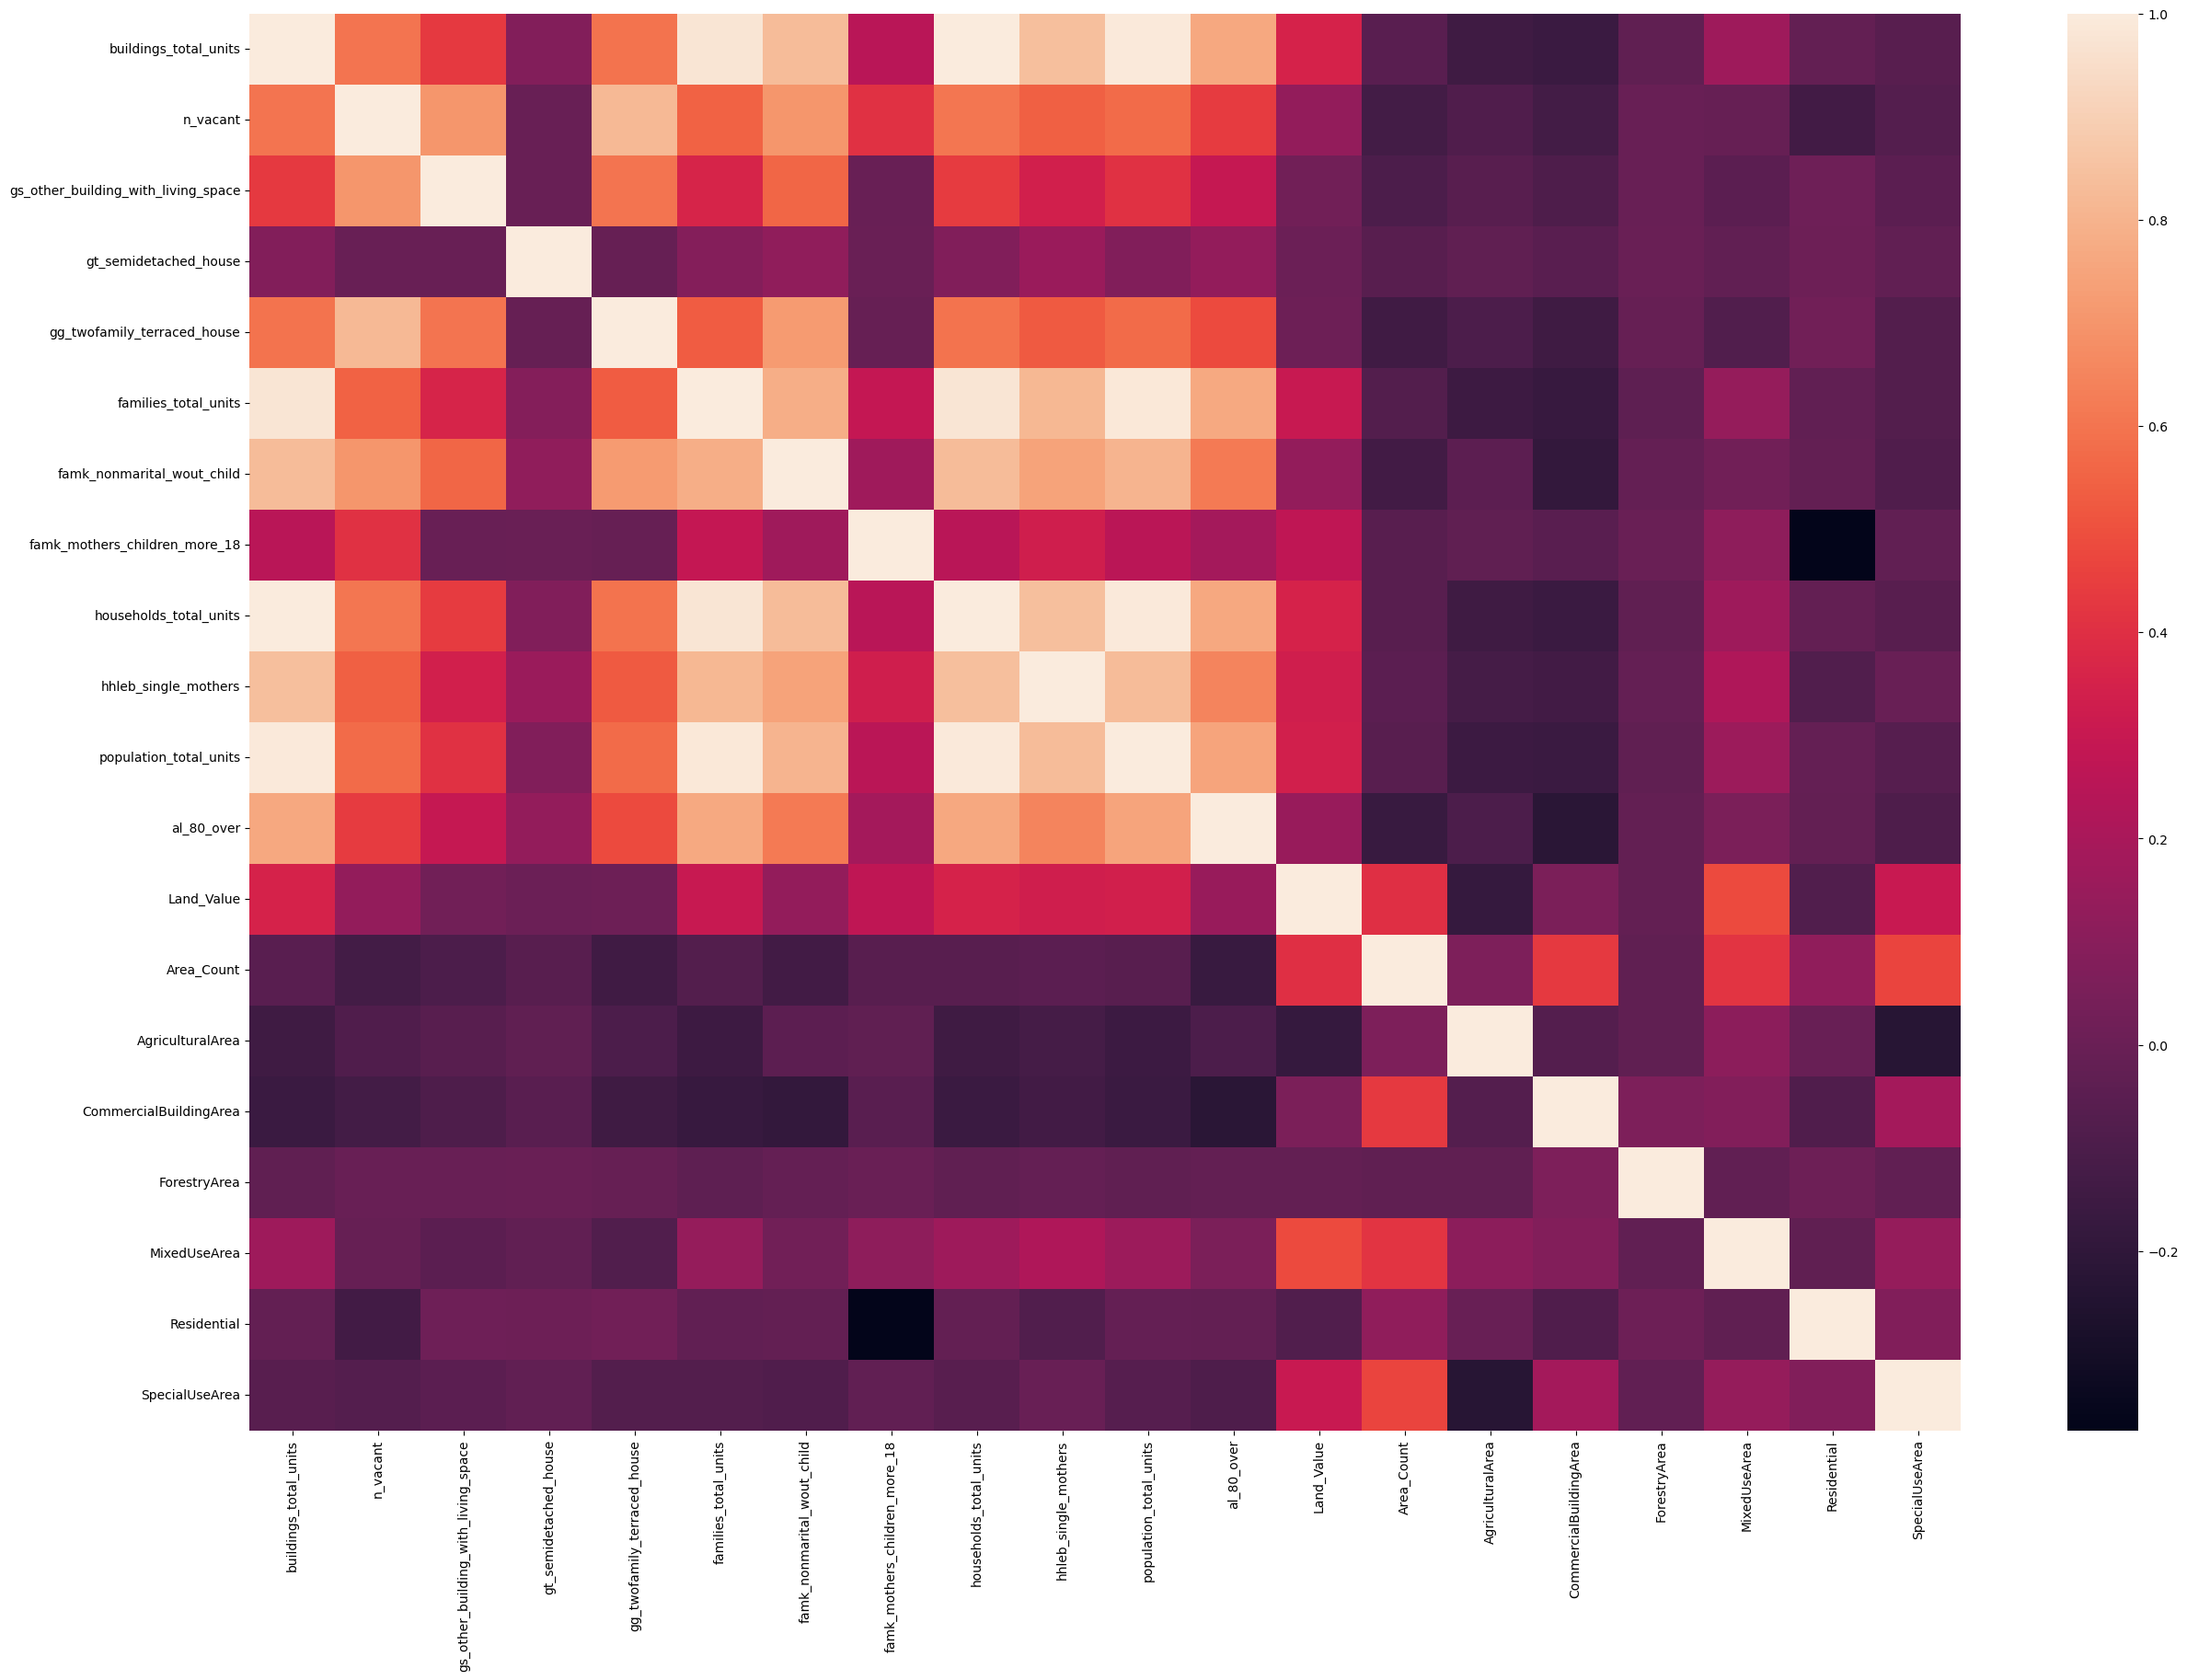

In [97]:
# calculate the correlation matrix
corr = df_all_cities.corr()


plt.figure(figsize=(30,20))
# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

plt.show

In [104]:
y = df_all_cities["Land_Value"].values.reshape(-1, 1)
X = df_all_cities[["gt_semidetached_house", "famk_mothers_children_more_18"]].values #'hhtyp_multiplepers_wout_nuclear',

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y)


In [105]:

X2 = sm.add_constant(X_scaled)
est = sm.OLS(y_scaled, X2)
est2 = est.fit()
print(est2.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     11.52
Date:                Sat, 29 Apr 2023   Prob (F-statistic):           1.55e-05
Time:                        20:20:26   Log-Likelihood:                -398.88
No. Observations:                 289   AIC:                             803.8
Df Residuals:                     286   BIC:                             814.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.041e-16      0.057   1.83e-15      1.0

In [100]:
regr = linear_model.LinearRegression()
regr.fit(X_scaled, y_scaled)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 [7.15189866e-18]
Coefficients: 
 [[ 2.05284446  0.02217961 -0.04625523  0.04492355 -0.09336868 -0.79142737
  -0.41363847  0.17842525  0.48340018 -0.03992052 -0.9136411  -0.16616363
   0.18149542  0.0074677   0.21561456 -0.04115249  0.17267244]]


In [101]:
cross_val_score(regr, X_scaled, y_scaled, cv = 3)

array([-0.05943381, -2.3631612 , -2.87443105])